# 激活函数

In [13]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

# 定义 x 的范围
x = np.linspace(-5, 5, 1000)
plt.figure(dpi=300)
# Sigmoid 函数
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# ReLU 函数
def relu(x):
    return np.maximum(0, x)

# Leaky ReLU 函数
def leaky_relu(x, alpha=0.01):
    return np.maximum(alpha * x, x)

# Tanh 函数
def tanh(x):
    return np.tanh(x)

# Softmax 函数
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)


<Figure size 1920x1440 with 0 Axes>

# 常见的激活函数

**sigmoid函数**：sigmoid函数是一个连续的、可导的函数，将实数映射到[0,1]区间内，常用于二分类问题。但是，sigmoid函数存在梯度消失的问题，当输入值过大或过小时，梯度接近于0，导致反向传播时梯度无法有效更新。

Text(0.5, 1.0, 'Sigmoid')

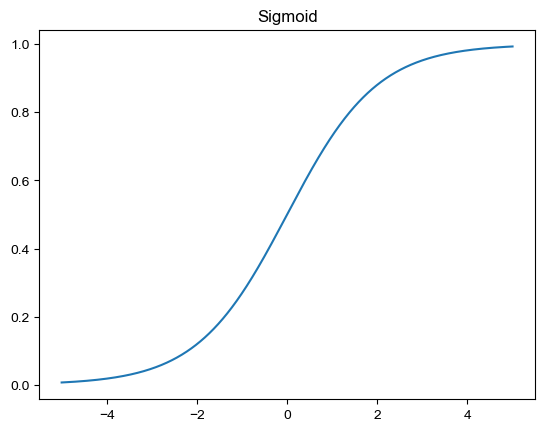

In [14]:
y = sigmoid(x)
plt.plot(x,y)
plt.title('Sigmoid')

Text(0.5, 1.0, 'Sigmoid导数')

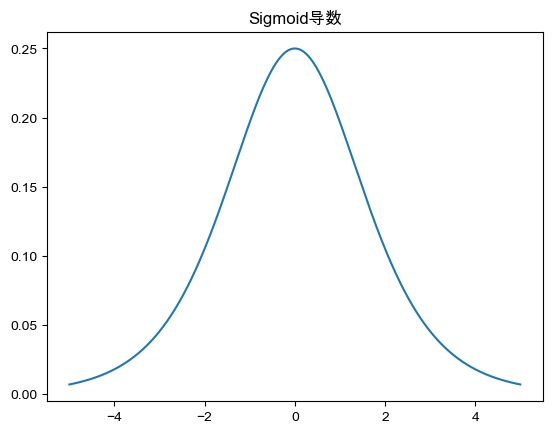

In [15]:
y = sigmoid(x)
plt.plot(x,y*(1-y))
plt.title('Sigmoid导数')

**ReLU函数**：ReLU函数是目前最常用的激活函数之一，其表达式为f(x) = max(0, x)，将负值直接截断为0，可以有效解决梯度消失的问题，但是存在神经元“死亡”的问题，即ReLU函数在训练过程中可能会将某些神经元的输出值永远置为0，导致这些神经元无法更新，在卷积神经网络中，可以通过 ReLU 函数来将卷积出的负相关置 0。

Text(0.5, 1.0, 'ReLU')

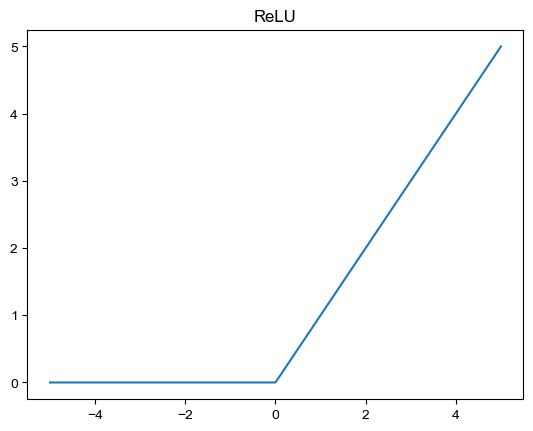

In [16]:
y = relu(x)
plt.plot(x,y)
plt.title('ReLU')

**LeakyReLU函数**：LeakyReLU函数是对ReLU函数的改进，其表达式为f(x) = max(0.01x, x)，当输入值为负时，不再直接截断为0，而是乘上一个小于1的斜率，可以有效解决ReLU函数存在的神经元“死亡”问题。

Text(0.5, 1.0, 'LeakyReLU')

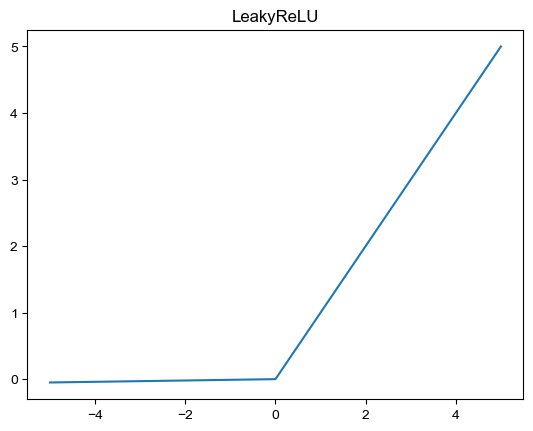

In [17]:
y = leaky_relu(x)
plt.plot(x,y)
plt.title('LeakyReLU')

**tanh函数**：tanh函数是一个连续的、可导的函数，将实数映射到[-1,1]区间内，tanh函数比sigmoid函数的表达能力更强，但是同样存在梯度消失的问题。

Text(0.5, 1.0, 'Tanh')

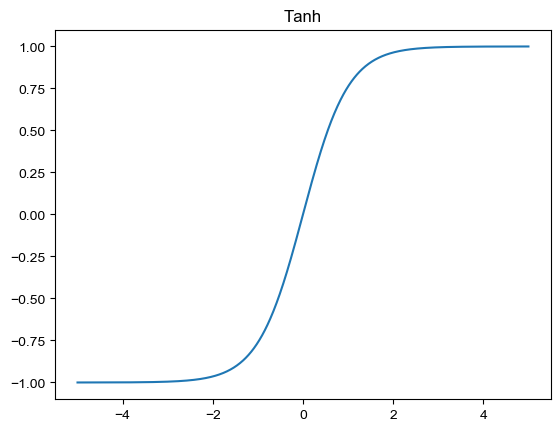

In [18]:
y = tanh(x)
plt.plot(x,y)
plt.title('Tanh')

# 初始化

## 初始化原因

深度学习权重初始化的目的是为了使模型在训练过程中能够更快地收敛，并且降低模型过拟合的风险。权重初始化是指在训练神经网络时对权重和偏置的初始值进行赋值。

在神经网络中，每个神经元的输出都是由其输入的加权和通过激活函数计算得到的。如果初始权重和偏置值太小，可能会导致梯度消失，使得训练过程中神经元的输出过小，从而影响模型的表达能力。而如果初始权重和偏置值太大，可能会导致梯度爆炸，使得神经网络的训练过程不稳定。



从方差的角度来解释权重初始化的目的，可以理解为我们希望在前向传播的过程中，数据在网络中的每一层都保持一个合适的方差，这样可以防止信号消失或爆炸。

假设我们有一个神经网络的一层输入 $x$，输出 $y$，权重为 $w$，偏差为 $b$，激活函数为 $\sigma(\cdot)$​，那么这一层的输出可以表示为：$y=\sigma(wx+b)$。

如果我们将 $w$ 和 $b$ 初始化为较大的值，那么对于一个输入 $x$，$wx$ 的值将会非常大，这样在经过激活函数之前，$y$ 的值也会变得非常大，导致梯度爆炸。相反，如果我们将 $w$ 和 $b$ 初始化为较小的值，那么对于一个输入 $x$，$wx$ 的值将会非常小，这样在经过激活函数之前，$y$ 的值也会变得非常小，导致梯度消失。

因此，我们希望在权重初始化时，能够保持每一层输出的方差尽可能相等，即保持信号在每一层都有一个合适的范围。这样可以保证梯度在反向传播时能够保持一个合适的大小，避免梯度消失或爆炸的问题。





## 不同激活函数

**Sigmoid函数**： Sigmoid函数的输出值在0到1之间，因此当初始权重过大或过小时，会导致梯度消失的问题。通常使用Xavier初始化方法，即从均匀分布中随机采样权重，并将其乘以$\sqrt{\frac{1}{\text{输入单元数}+\text{输出单元数}}}$。



**Tanh函数**： Tanh函数的输出值在-1到1之间，和Sigmoid函数类似，当初始权重过大或过小时，会导致梯度消失的问题。因此，通常使用Xavier初始化方法



**ReLU函数：** ReLU函数在$x<0$时的梯度为0，因此当初始权重为负数时，梯度将永远为0，无法进行权重更新。因此，通常使用Kaiming初始化方法，即从正态分布中随机采样权重，并将其乘以$\sqrt{\frac{2}{\text{输入单元数}}}$。



**LeakyReLU函数**： LeakyReLU函数在$x<0$时的梯度不为0，但是当初始权重过大或过小时，仍然会产生梯度消失或梯度爆炸的问题。因此，可以采用和ReLU函数类似的Kaiming初始化方法，或使用自适应的权重初始化方法。





## Xavier初始化

Xavier初始化方法是一种权重初始化方法，旨在解决梯度消失和梯度爆炸的问题，加快神经网络的训练速度。

该方法根据网络输入和输出的维度来初始化权重，保证了信号的传播和梯度的流动在每一层中都有一个合理的范围。具体来说，对于一个神经网络的某一层，Xavier初始化将该层的权重初始化为一个均匀分布或者正态分布的随机变量，其标准差为：

$stddev = \sqrt{\frac{2}{n_{in}+n_{out}}}$，$n_{in}$和$n_{out}$分别表示该层的输入和输出的维度。





## Kaiming初始化

Kaiming初始化方法是一种针对于ReLU激活函数的权重初始化方法，它是在Xavier初始化的基础上进行了改进。在Xavier初始化方法中，假设前一层神经元的个数为$n$，后一层神经元的个数为$m$，则权重$W$初始化为均匀分布$U(-\sqrt{\frac{6}{n+m}}, \sqrt{\frac{6}{n+m}})$或者高斯分布$N(0, \sqrt{\frac{2}{n+m}})$。但是在使用ReLU激活函数时，如果使用Xavier初始化方法，会导致网络训练过程中的梯度消失或梯度爆炸的问题。因此，Kaiming等人提出了一种改进的初始化方法，即Kaiming初始化方法。

Kaiming初始化方法使用的权重初始化范围是正态分布$N(0, \sqrt{\frac{2}{n}})$，其中$n$是前一层神经元的个数。Kaiming初始化方法的改进之处在于，它考虑了ReLU激活函数的特点，将分布的标准差变为$\sqrt{\frac{2}{n}}$，以便更好地适应ReLU激活函数的非线性变换特点。这样，Kaiming初始化方法可以有效地缓解ReLU激活函数对网络梯度的影响，提高神经网络的训练效果。



## Pytorch 实现


1.在模型定义时候实现

In [19]:
import torch.nn as nn

class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.fc1 = nn.Linear(in_features=10, out_features=20)
        self.fc2 = nn.Linear(in_features=20, out_features=30)

        nn.init.kaiming_uniform_(self.fc1.weight, nonlinearity='relu')  # 将 fc 的权重通过 kaiming 方式进行初始化
        nn.init.zeros_(self.fc1.bias)  # 偏置变成 0

        nn.init.kaiming_uniform_(self.fc2.weight, nonlinearity='relu')
        nn.init.zeros_(self.fc2.bias)

    def forward(self, x):
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        return x

2.通过`torch.nn.Module.apply()`来遍历模型的所有参数，并应用特定初始化方法。

In [20]:
def weights_init(m):
    if isinstance(m, nn.Linear):
        nn.init.kaiming_uniform_(m.weight, nonlinearity='relu')
        nn.init.zeros_(m.bias)

model = MyModel()
model.apply(weights_init)

MyModel(
  (fc1): Linear(in_features=10, out_features=20, bias=True)
  (fc2): Linear(in_features=20, out_features=30, bias=True)
)

In [1]:
gaigai

NameError: name 'gaigai' is not defined

# gaigai
